In [2]:
# ------------------------
## ----import libraries
# ------------------------
import os,sys
import numpy as np
# xarray
import xarray as xr
# plot
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage,AnchoredOffsetbox

import pandas as pd

In [3]:
from dask.distributed import Client
c = Client()
c

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 5
Total threads: 10,Total memory: 20.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33183,Workers: 5
Dashboard: http://127.0.0.1:8787/status,Total threads: 10
Started: Just now,Total memory: 20.00 GiB
Comm: tcp://127.0.0.1:44541,Total threads: 2
Dashboard: http://127.0.0.1:37049/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:43521,


In [4]:
# read grid files
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"
mesh = xr.open_dataset(diri+'mesh_hgr.nc')
tmask = mesh.tmask.squeeze().isel(nav_lev=0) # grille lat/lon
nav_lon = mesh['nav_lon'].squeeze()
nav_lat = mesh['nav_lat'].squeeze()
e1t = mesh['e1t'].squeeze()
e2t = mesh['e2t'].squeeze()
cellArea=e1t*e2t

# GAI

In [5]:
path = "/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I"
chunk_size = {"time_counter":1}

## RNF module est correct

In [6]:
dsrnf = xr.open_mfdataset(path+"/eORCA025.L75_1m_greenland_rnfbis_y*.nc", chunks=chunk_size).sel(time_counter=slice('1980','2018'))
rnfmask = dsrnf.socoefr
gr_rnf = dsrnf.sorunoff
gr_rnf

<xarray.DataArray 'sorunoff' (time_counter: 468, y: 1207, x: 1442)>
dask.array<getitem, shape=(468, 1207, 1442), dtype=float32, chunksize=(1, 1207, 1442), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1980-01-01 ... 2018-12-01
Dimensions without coordinates: y, x
Attributes:
    long_name:   Surface runoff
    short_name:  sorunoff
    units:       kg/m2/s

In [6]:
# whole greenland  unité est ici : mSv
# fenetre du plot
imin = 930; imax = 1100
jmin = 960; jmax = 1200
rnf_H = gr_rnf.where(rnfmask==0.5).isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
cellArea_H = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_H = (rnf_H * cellArea_H / 1000).sum(('x','y')) # 1000 est ici la densité rho # unité est ici : m3/s
debit_H = debit_H/1e3 # unité est ici : mSv

# basin A : SouthWest
# fenetre du plot
imin = 955; imax = 982
jmin = 960; jmax = 1044
rnf_A = gr_rnf.where(rnfmask==0.5).isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
cellArea_A = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_A = (rnf_A * cellArea_A/ 1000).sum(('x','y'))
debit_A = debit_A/1e3

# basin B : CentralWest
# fenetre du plot
imin = 955; imax = 982
jmin = 1044; jmax = 1071
rnf_B = gr_rnf.where(rnfmask==0.5).isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
cellArea_B = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_B = (rnf_B * cellArea_B/ 1000).sum(('x','y'))
debit_B = debit_B/1e3

# basin C : NorthWest
# fenetre du plot
imin = 955; imax = 982
jmin = 1071; jmax = 1138
rnf_C =  gr_rnf.where(rnfmask==0.5).isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
cellArea_C = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_C = (rnf_C * cellArea_C/ 1000).sum(('x','y'))
debit_C = debit_C/1e3

# basin D : NO
# fenetre du plot
imin = 970; imax = 1057
jmin = 1138; jmax = 1150
rnf_D = gr_rnf.where(rnfmask==0.5).isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
cellArea_D = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_D = (rnf_D * cellArea_D/ 1000).sum(('x','y'))
debit_D = debit_D/1e3

# basin E : NorthEast
# fenetre du plot
imin = 1057; imax = 1100
jmin = 1070; jmax = 1150
rnf_E = gr_rnf.where(rnfmask==0.5).isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
cellArea_E = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_E = (rnf_E * cellArea_E/ 1000).sum(('x','y'))
debit_E = debit_E/1e3

# basin F : CentralEast
# fenetre du plot
imin = 982; imax = 1100
jmin = 1018; jmax = 1070
rnf_F = gr_rnf.where(rnfmask==0.5).isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
cellArea_F = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_F = (rnf_F * cellArea_F/ 1000).sum(('x','y'))
debit_F = debit_F/1e3

# basin G : southEast
# fenetre du plot
imin = 982; imax = 1100
jmin = 960; jmax = 1018
rnf_G =  gr_rnf.where(rnfmask==0.5).isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
cellArea_G = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_G = (rnf_G * cellArea_G/ 1000).sum(('x','y'))
debit_G = debit_G/1e3

In [25]:
# testmaskprep = gr_rnf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
# testmask = testmaskprep.where(testmaskprep!=0)
# debit_Htest = (testmask * cellArea_H / 1000).sum(('x','y')).groupby('time_counter.year').mean('time_counter') # 1000 est ici la densité rho # unité est ici : m3/s


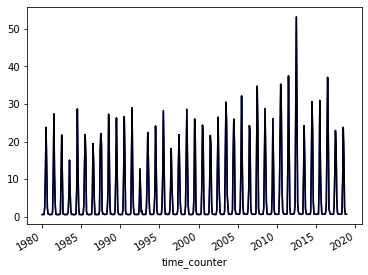

In [7]:
debittot = debit_A + debit_B + debit_C + debit_D + debit_E + debit_F + debit_G

debittot.plot(color='b')
debit_H.plot(color='k')

In [9]:
(debit_H)

<xarray.DataArray (time_counter: 468)>
dask.array<truediv, shape=(468,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1980-01-01 ... 2018-12-01

In [10]:
diroww = '/gpfswork/rech/cli/uor98hu/MYDATA/Gr_contribution/Gr_forcing_verif/'
ds = xr.Dataset(
    data_vars=dict(Southwest=(["time_counter"], debit_A.data),
                   Central_West=(["time_counter"], debit_B.data),
                   Northwest=(["time_counter"], debit_C.data),
                   North=(["time_counter"], debit_D.data),
                   Northeast=(["time_counter"], debit_E.data),
                   Central_east=(["time_counter"], debit_F.data),
                   southeast=(["time_counter"], debit_G.data),
                    Greenland=(["time_counter"], debit_H.data),

    ),

    coords=dict(time_counter=debit_H.time_counter.values),
    attrs=dict(description="Greenland's runoff (0 to 10 m) per basin for run GAI [mSv] in monthly"),

)

ds.to_netcdf(path=diroww+'Gr_rnf_mean_perbasin_GAI_1m.nc')

## ISF module

In [11]:
dsisf = xr.open_mfdataset(path+"/eORCA025.L75_1m_greenland_isfbis_y*.nc", chunks=chunk_size).sel(time_counter=slice('1980','2018')).sornfisf

In [13]:
dsisf

<xarray.DataArray 'sornfisf' (time_counter: 468, y: 1207, x: 1442)>
dask.array<getitem, shape=(468, 1207, 1442), dtype=float32, chunksize=(1, 1207, 1442), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1980-01-01 ... 2018-12-01
Dimensions without coordinates: y, x
Attributes:
    long_name:   Ice Shelf Melting rate
    short_name:  sornfisf
    units:       kg/m2/s

In [14]:
#whole greenland : H
# fenetre du plot
imin = 930; imax = 1100
jmin = 960; jmax = 1200
rnf_H = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_H = rnf_H.where(rnf_H!=0) #combine='nested', concat_dim="time_counter" 
cellArea_H = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_H = (rnf_H * cellArea_H).sum(('x','y'))
debit_H = debit_H/1e6 # est en mSv

# basin A : SouthWest
# fenetre du plot
imin = 955; imax = 982
jmin = 960; jmax = 1044
rnf_A = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_A = rnf_A.where(rnf_A!=0) #combine='nested', concat_dim="time_counter" 
cellArea_A = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_A = (rnf_A * cellArea_A).sum(('x','y'))
debit_A = debit_A/1e6

# basin B : CentralWest
# fenetre du plot
imin = 955; imax = 982
jmin = 1044; jmax = 1075
rnf_B = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_B = rnf_B.where(rnf_B!=0) #combine='nested', concat_dim="time_counter" 
cellArea_B = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_B = (rnf_B * cellArea_B).sum(('x','y'))
debit_B = debit_B/1e6

# basin C : NorthWest
# fenetre du plot
imin = 955; imax = 982
jmin = 1075; jmax = 1138
rnf_C = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_C = rnf_C.where(rnf_C!=0) #combine='nested', concat_dim="time_counter" 
cellArea_C = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_C = (rnf_C * cellArea_C).sum(('x','y'))
debit_C = debit_C/1e6

# basin D : NO
# fenetre du plot
imin = 975; imax = 1063
jmin = 1130; jmax = 1155
rnf_D = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_D = rnf_D.where(rnf_D!=0) #combine='nested', concat_dim="time_counter" 
cellArea_D = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_D = (rnf_D * cellArea_D).sum(('x','y'))
debit_D = debit_D/1e6

# basin E : NorthEast
# fenetre du plot
imin = 1054; imax = 1100
jmin = 1070; jmax = 1150
rnf_E = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_E = rnf_E.where(rnf_E!=0) #combine='nested', concat_dim="time_counter" 
cellArea_E = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_E = (rnf_E * cellArea_E).sum(('x','y'))
debit_E = debit_E/1e6

# basin F : CentralEast
# fenetre du plot
imin = 982; imax = 1100
jmin = 1018; jmax = 1070
rnf_F = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_F = rnf_F.where(rnf_F!=0) #combine='nested', concat_dim="time_counter" 
cellArea_F = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_F = (rnf_F * cellArea_F).sum(('x','y'))
debit_F = debit_F/1e6

# basin G : southEast
# fenetre du plot
imin = 982; imax = 1100
jmin = 960; jmax = 1018
rnf_G = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_G = rnf_G.where(rnf_G!=0) #combine='nested', concat_dim="time_counter" 
cellArea_G = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_G = (rnf_G * cellArea_G).sum(('x','y'))
debit_G = debit_G/1e6

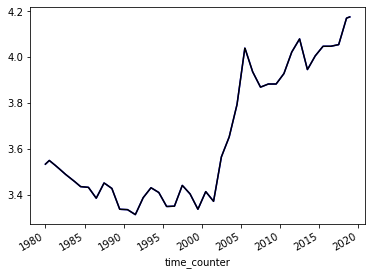

In [15]:
debittot = debit_A + debit_B + debit_C + debit_D + debit_E + debit_F + debit_G

debittot.plot(color='b')
debit_H.plot(color='k')

In [17]:
debit_H

<xarray.DataArray (time_counter: 468)>
dask.array<truediv, shape=(468,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1980-01-01 ... 2018-12-01

In [18]:
diroww = '/gpfswork/rech/cli/uor98hu/MYDATA/Gr_contribution/Gr_forcing_verif/'
ds = xr.Dataset(
    data_vars=dict(Southwest=(["time_counter"], debit_A.data),
                   Central_West=(["time_counter"], debit_B.data),
                   Northwest=(["time_counter"], debit_C.data),
                   North=(["time_counter"], debit_D.data),
                   Northeast=(["time_counter"], debit_E.data),
                   Central_east=(["time_counter"], debit_F.data),
                   southeast=(["time_counter"], debit_G.data),
                    Greenland=(["time_counter"], debit_H.data),

    ),

    coords=dict(time_counter=debit_H.time_counter.values),
    attrs=dict(description="Greenland's iceshelf basal melting per basin for run GAI [mSv] en mensuel"),

)

ds.to_netcdf(path=diroww+'Gr_isf_mean_perbasin_GAI_1m.nc')

## Iceberg module

In [26]:
ds = xr.open_mfdataset(path+"/eORCA025.L75_1m_greenland_calvingbis_y*.nc", chunks=chunk_size).sel(time_counter=slice('1980','2018')).soicbclv
# conversion de GT/yr to mSv =  * 1e6/31560000 

In [27]:
# whole greenland
# fenetre du plot
imin = 930; imax = 1100
jmin = 960; jmax = 1200
rnf_H = ds.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_H = rnf_H.where(rnf_H!=0) #combine='nested', concat_dim="time_counter" 
debit_H = (rnf_H * 1e6/31560000 ).sum(('x','y'))


# basin A : SouthWest
# fenetre du plot
imin = 955; imax = 982
jmin = 960; jmax = 1044
rnf_A = ds.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_A = rnf_A.where(rnf_A!=0) #combine='nested', concat_dim="time_counter" 
debit_A = (rnf_A * 1e6/31560000 ).sum(('x','y'))


# basin B : CentralWest
# fenetre du plot
imin = 955; imax = 982
jmin = 1044; jmax = 1075
rnf_B = ds.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_B = rnf_B.where(rnf_B!=0) #combine='nested', concat_dim="time_counter" 
debit_B = (rnf_B * 1e6/31560000 ).sum(('x','y'))


# basin C : NorthWest
# fenetre du plot
imin = 955; imax = 982
jmin = 1075; jmax = 1138
rnf_C = ds.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_C = rnf_C.where(rnf_C!=0) #combine='nested', concat_dim="time_counter" 
debit_C = (rnf_C *1e6/31560000 ).sum(('x','y'))


# basin D : NO
# fenetre du plot
imin = 975; imax = 1063
jmin = 1130; jmax = 1155
rnf_D = ds.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_D = rnf_D.where(rnf_D!=0) #combine='nested', concat_dim="time_counter" 
debit_D = (rnf_D * 1e6/31560000 ).sum(('x','y'))

# basin E : NorthEast
# fenetre du plot
imin = 1054; imax = 1100
jmin = 1070; jmax = 1150
rnf_E = ds.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_E = rnf_E.where(rnf_E!=0) #combine='nested', concat_dim="time_counter" 
debit_E = (rnf_E * 1e6/31560000 ).sum(('x','y'))

# basin F : CentralEast
# fenetre du plot
imin = 982; imax = 1100
jmin = 1018; jmax = 1070
rnf_F = ds.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_F = rnf_F.where(rnf_F!=0) #combine='nested', concat_dim="time_counter" 
debit_F = (rnf_F * 1e6/31560000 ).sum(('x','y'))

# basin G : southEast
# fenetre du plot
imin = 982; imax = 1100
jmin = 960; jmax = 1018
rnf_G = ds.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_G = rnf_G.where(rnf_G!=0) #combine='nested', concat_dim="time_counter" 
debit_G = (rnf_G *  1e6/31560000 ).sum(('x','y'))


In [28]:
debittot = debit_A +debit_B+debit_C+debit_D+debit_E+debit_F+debit_G

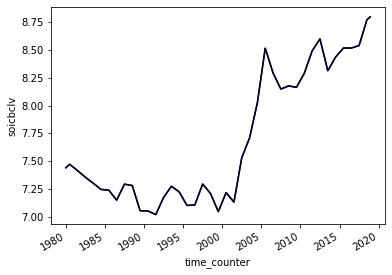

In [29]:
debittot.plot(color='b')
debit_H.plot(color='k')

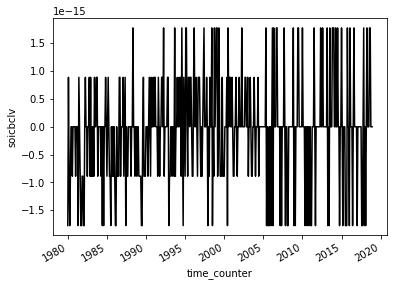

In [30]:
(debittot - debit_H).plot(color='k')

In [31]:
diroww = '/gpfswork/rech/cli/uor98hu/MYDATA/Gr_contribution/Gr_forcing_verif/'
ds = xr.Dataset(
    data_vars=dict(Southwest=(["time_counter"], debit_A.data),
                   Central_West=(["time_counter"], debit_B.data),
                   Northwest=(["time_counter"], debit_C.data),
                   North=(["time_counter"], debit_D.data),
                   Northeast=(["time_counter"], debit_E.data),
                   Central_east=(["time_counter"], debit_F.data),
                   southeast=(["time_counter"], debit_G.data),
                    Greenland=(["time_counter"], debit_H.data),

    ),

    coords=dict(time_counter=debit_A.time_counter.values),
    attrs=dict(description="Greenland's iceberg calving per basin for run GAI [mSv] en mensuel"),

)

ds.to_netcdf(path=diroww+'Gr_mean_calving_perbasin_GAI_1m.nc')

# AI

## RNF module

In [31]:
da = xr.open_dataset(path+"/eORCA025.L75_1m_greenland_rnfbis_clim_y1950-1972.nc", chunks=chunk_size).sorunoff

In [32]:
#whole greenland : H
# fenetre du plot
imin = 930; imax = 1100
jmin = 960; jmax = 1200
rnf_H = rnfAI.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_H = rnf_H.where(rnf_H!=0) #combine='nested', concat_dim="time_counter" 
cellArea_H = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_H = (rnf_H * cellArea_H).sum(('x','y'))
debit_H = debit_H/1e6 # est en mSv

# basin A : SouthWest
# fenetre du plot
imin = 955; imax = 982
jmin = 960; jmax = 1044
rnf_A = da.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_A = rnf_A.where(rnf_A!=0) #combine='nested', concat_dim="time_counter" 
cellArea_A = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_A = (rnf_A * cellArea_A).sum(('x','y'))
debit_A = debit_A/1e6

# basin B : CentralWest
# fenetre du plot
imin = 955; imax = 982
jmin = 1044; jmax = 1071
rnf_B = da.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_B = rnf_B.where(rnf_B!=0) #combine='nested', concat_dim="time_counter" 
cellArea_B = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_B = (rnf_B * cellArea_B).sum(('x','y'))
debit_B = debit_B/1e6

# basin C : NorthWest
# fenetre du plot
imin = 955; imax = 982
jmin = 1071; jmax = 1138
rnf_C = da.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_C = rnf_C.where(rnf_C!=0) #combine='nested', concat_dim="time_counter" 
cellArea_C = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_C = (rnf_C * cellArea_C).sum(('x','y'))
debit_C = debit_C/1e6

# basin D : NO
# fenetre du plot
imin = 970; imax = 1057
jmin = 1138; jmax = 1150
rnf_D = da.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_D = rnf_D.where(rnf_D!=0) #combine='nested', concat_dim="time_counter" 
cellArea_D = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_D = (rnf_D * cellArea_D).sum(('x','y'))
debit_D = debit_D/1e6

# basin E : NorthEast
# fenetre du plot
imin = 1057; imax = 1100
jmin = 1070; jmax = 1150
rnf_E = da.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_E = rnf_E.where(rnf_E!=0) #combine='nested', concat_dim="time_counter" 
cellArea_E = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_E = (rnf_E * cellArea_E).sum(('x','y'))
debit_E = debit_E/1e6

# basin F : CentralEast
# fenetre du plot
imin = 982; imax = 1100
jmin = 1018; jmax = 1070
rnf_F = da.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_F = rnf_F.where(rnf_F!=0) #combine='nested', concat_dim="time_counter" 
cellArea_F = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_F = (rnf_F * cellArea_F).sum(('x','y'))
debit_F = debit_F/1e6

# basin G : southEast
# fenetre du plot
imin = 982; imax = 1100
jmin = 960; jmax = 1018
rnf_G = da.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_G = rnf_G.where(rnf_G!=0) #combine='nested', concat_dim="time_counter" 
cellArea_G = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_G = (rnf_G * cellArea_G).sum(('x','y'))
debit_G = debit_G/1e6

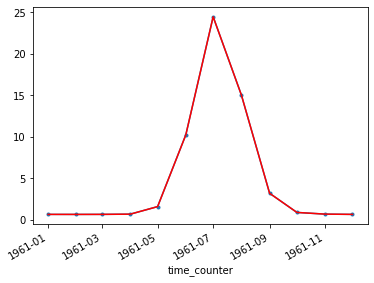

In [33]:
debittot = debit_A +debit_B+debit_C+debit_D+debit_E+debit_F+debit_G
debit_H.plot(marker=".")
debittot.plot(color='r')

In [36]:
diroww = '/gpfswork/rech/cli/uor98hu/MYDATA/Gr_contribution/Gr_forcing_verif/'
ds = xr.Dataset(
    data_vars=dict(Southwest=(["time_counter"], debit_A.data),
                   Central_West=(["time_counter"], debit_B.data),
                   Northwest=(["time_counter"], debit_C.data),
                   North=(["time_counter"], debit_D.data),
                   Northeast=(["time_counter"], debit_E.data),
                   Central_east=(["time_counter"], debit_F.data),
                   southeast=(["time_counter"], debit_G.data),
                    Greenland=(["time_counter"], debit_H.data),

    ),

    coords=dict(time_counter=debit_H.time_counter),
    attrs=dict(description="Greenland's rnf per basin for run AI [mSv]"),

)

ds.to_netcdf(path=diroww+'Gr_rnf_mean_perbasin_AI.nc')

## ISF module

In [58]:
dsisf = xr.open_dataset(path+"/eORCA025.L75_1m_greenland_isfbis_clim_y1950-1972.nc", chunks=chunk_size).sornfisf#.sel(time_counter=slice('1980','2018'))

In [59]:
#whole greenland : H
# fenetre du plot
imin = 930; imax = 1100
jmin = 960; jmax = 1200
rnf_H = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_H = rnf_H.where(rnf_H!=0) #combine='nested', concat_dim="time_counter" 
cellArea_H = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_H = (rnf_H * cellArea_H).sum(('x','y'))
debit_H = debit_H/1e6 # est en mSv

# basin A : SouthWest
# fenetre du plot
imin = 955; imax = 982
jmin = 960; jmax = 1044
rnf_A = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_A = rnf_A.where(rnf_A!=0) #combine='nested', concat_dim="time_counter" 
cellArea_A = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_A = (rnf_A * cellArea_A).sum(('x','y'))
debit_A = debit_A/1e6

# basin B : CentralWest
# fenetre du plot
imin = 955; imax = 982
jmin = 1044; jmax = 1075
rnf_B = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_B = rnf_B.where(rnf_B!=0) #combine='nested', concat_dim="time_counter" 
cellArea_B = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_B = (rnf_B * cellArea_B).sum(('x','y'))
debit_B = debit_B/1e6

# basin C : NorthWest
# fenetre du plot
imin = 955; imax = 982
jmin = 1075; jmax = 1138
rnf_C = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_C = rnf_C.where(rnf_C!=0) #combine='nested', concat_dim="time_counter" 
cellArea_C = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_C = (rnf_C * cellArea_C).sum(('x','y'))
debit_C = debit_C/1e6

# basin D : NO
# fenetre du plot
imin = 975; imax = 1063
jmin = 1130; jmax = 1155
rnf_D = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_D = rnf_D.where(rnf_D!=0) #combine='nested', concat_dim="time_counter" 
cellArea_D = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_D = (rnf_D * cellArea_D).sum(('x','y'))
debit_D = debit_D/1e6

# basin E : NorthEast
# fenetre du plot
imin = 1054; imax = 1100
jmin = 1070; jmax = 1150
rnf_E = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_E = rnf_E.where(rnf_E!=0) #combine='nested', concat_dim="time_counter" 
cellArea_E = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_E = (rnf_E * cellArea_E).sum(('x','y'))
debit_E = debit_E/1e6

# basin F : CentralEast
# fenetre du plot
imin = 982; imax = 1100
jmin = 1018; jmax = 1070
rnf_F = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_F = rnf_F.where(rnf_F!=0) #combine='nested', concat_dim="time_counter" 
cellArea_F = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_F = (rnf_F * cellArea_F).sum(('x','y'))
debit_F = debit_F/1e6

# basin G : southEast
# fenetre du plot
imin = 982; imax = 1100
jmin = 960; jmax = 1018
rnf_G = dsisf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_G = rnf_G.where(rnf_G!=0) #combine='nested', concat_dim="time_counter" 
cellArea_G = cellArea.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
debit_G = (rnf_G * cellArea_G).sum(('x','y'))
debit_G = debit_G/1e6

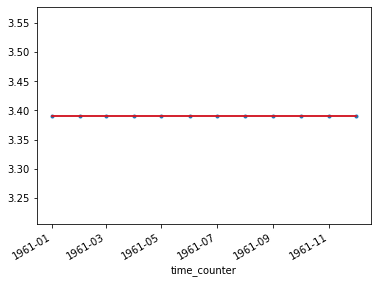

In [60]:
debittot = debit_A +debit_B+debit_C+debit_D+debit_E+debit_F+debit_G
debit_H.plot(marker=".")
debittot.plot(color='r')

In [61]:
diroww = '/gpfswork/rech/cli/uor98hu/MYDATA/Gr_contribution/Gr_forcing_verif/'
ds = xr.Dataset(
    data_vars=dict(Southwest=(["time_counter"], debit_A.data),
                   Central_West=(["time_counter"], debit_B.data),
                   Northwest=(["time_counter"], debit_C.data),
                   North=(["time_counter"], debit_D.data),
                   Northeast=(["time_counter"], debit_E.data),
                   Central_east=(["time_counter"], debit_F.data),
                   southeast=(["time_counter"], debit_G.data),
                    Greenland=(["time_counter"], debit_H.data),

    ),

    coords=dict(time_counter=debit_A.time_counter),
    attrs=dict(description="Greenland's iceshelf basal melting per basin for run AI [mSv]"),

)

ds.to_netcdf(path=diroww+'Gr_isf_mean_perbasin_AI.nc')

## Iceberg module

In [74]:
da = xr.open_dataset(path+"/eORCA025.L75_1m_greenland_calvingbis_clim_y1950-1972_GTpyear.nc", chunks=chunk_size).soicbclv#.sel(time_counter=slice('1980','2018'))


In [75]:
%%time
#whole greenland : H
# fenetre du plot
imin = 930; imax = 1100
jmin = 960; jmax = 1200
rnf_H = da.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_H = rnf_H.where(rnf_H!=0) #combine='nested', concat_dim="time_counter" 
debit_H = (rnf_H *  1e6/31560000 ).sum(('x','y'))

# basin A : SouthWest
# fenetre du plot
imin = 955; imax = 982
jmin = 960; jmax = 1044
rnf_A = da.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_A = rnf_A.where(rnf_A!=0) #combine='nested', concat_dim="time_counter" 
debit_A = (rnf_A * 1e6/31560000).sum(('x','y'))

# basin B : CentralWest
# fenetre du plot
imin = 955; imax = 982
jmin = 1044; jmax = 1075
rnf_B = da.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_B = rnf_B.where(rnf_B!=0) #combine='nested', concat_dim="time_counter" 
debit_B = (rnf_B *  1e6/31560000).sum(('x','y'))

# basin C : NorthWest
# fenetre du plot
imin = 955; imax = 981
jmin = 1075; jmax = 1139
rnf_C = da.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_C = rnf_C.where(rnf_C!=0) #combine='nested', concat_dim="time_counter" 
debit_C = (rnf_C *  1e6/31560000).sum(('x','y'))

# basin D : NO
# fenetre du plot
imin = 975; imax = 1063
jmin = 1130; jmax = 1155
rnf_D = da.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_D = rnf_D.where(rnf_D!=0) #combine='nested', concat_dim="time_counter" 
debit_D = (rnf_D *  1e6/31560000).sum(('x','y'))

# basin E : NorthEast
# fenetre du plot
imin = 1054; imax = 1100
jmin = 1070; jmax = 1150
rnf_E = da.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_E = rnf_E.where(rnf_E!=0) #combine='nested', concat_dim="time_counter" 
debit_E = (rnf_E *  1e6/31560000).sum(('x','y'))

# basin F : CentralEast
# fenetre du plot
imin = 982; imax = 1100
jmin = 1018; jmax = 1070
rnf_F = da.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_F = rnf_F.where(rnf_F!=0) #combine='nested', concat_dim="time_counter" 
debit_F = (rnf_F *  1e6/31560000).sum(('x','y'))

# basin G : southEast
# fenetre du plot
imin = 982; imax = 1100
jmin = 960; jmax = 1018
rnf_G = da.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
rnf_G = rnf_G.where(rnf_G!=0) #combine='nested', concat_dim="time_counter" 
debit_G = (rnf_G *  1e6/31560000).sum(('x','y'))

CPU times: user 71.2 ms, sys: 5.66 ms, total: 76.9 ms
Wall time: 75.3 ms


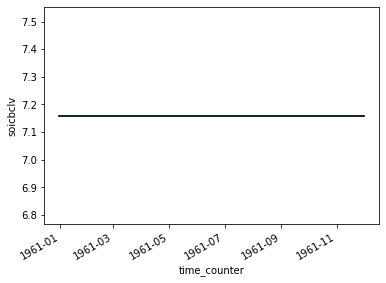

In [76]:
debittot = debit_A +debit_B+debit_C+debit_D+debit_E+debit_F+debit_G
debit_H.plot()
debittot.plot(color="k")

In [77]:
diroww = '/gpfswork/rech/cli/uor98hu/MYDATA/Gr_contribution/Gr_forcing_verif/'
ds = xr.Dataset(
    data_vars=dict(Southwest=(["time_counter"], debit_A.data),
                   Central_West=(["time_counter"], debit_B.data),
                   Northwest=(["time_counter"], debit_C.data),
                   North=(["time_counter"], debit_D.data),
                   Northeast=(["time_counter"], debit_E.data),
                   Central_east=(["time_counter"], debit_F.data),
                   southeast=(["time_counter"], debit_G.data),
                    Greenland=(["time_counter"], debit_H.data),

    ),

    coords=dict(time_counter=debit_H.time_counter),
    attrs=dict(description="Greenland's iceberg calving per basin for run AI [mSv]"),

)

ds.to_netcdf(path=diroww+'Gr_mean_calving_perbasin_AI.nc')

# save netcdf file with all types

### for AI

In [78]:
dirww = '/gpfswork/rech/cli/uor98hu/MYDATA/Gr_contribution/Gr_forcing_verif/'
rnfAI = xr.open_dataset(dirww+'Gr_rnf_mean_perbasin_AI.nc')
isfAI = xr.open_dataset(dirww+'Gr_isf_mean_perbasin_AI.nc')
calvingAI = xr.open_dataset(dirww+'Gr_mean_calving_perbasin_AI.nc')

In [79]:
rnfAISouthwest    = rnfAI.Southwest
rnfAICentral_West = rnfAI.Central_West
rnfAINorthwest    = rnfAI.Northwest
rnfAINorth        = rnfAI.North
rnfAINortheast    = rnfAI.Northeast
rnfAICentral_east = rnfAI.Central_east
rnfAIsoutheast    = rnfAI.southeast

isfAISouthwest    = isfAI.Southwest
isfAICentral_West = isfAI.Central_West
isfAINorthwest    = isfAI.Northwest
isfAINorth        = isfAI.North
isfAINortheast    = isfAI.Northeast
isfAICentral_east = isfAI.Central_east
isfAIsoutheast    = isfAI.southeast

calvingAISouthwest    = calvingAI.Southwest
calvingAICentral_West = calvingAI.Central_West
calvingAINorthwest    = calvingAI.Northwest
calvingAINorth        = calvingAI.North
calvingAINortheast    = calvingAI.Northeast
calvingAICentral_east = calvingAI.Central_east
calvingAIsoutheast    = calvingAI.southeast

In [80]:
AISouthwest     = rnfAISouthwest    + isfAISouthwest    + calvingAISouthwest
AICentral_West  = rnfAICentral_West + isfAICentral_West + calvingAICentral_West
AINorthwest     = rnfAINorthwest    + isfAINorthwest    + calvingAINorthwest
AINorth         = rnfAINorth        + isfAINorth        + calvingAINorth 
AINortheast     = rnfAINortheast    + isfAINortheast    + calvingAINortheast
AICentral_east  = rnfAICentral_east + isfAICentral_east + calvingAICentral_east
AISoutheast     = rnfAIsoutheast    + isfAIsoutheast    + calvingAIsoutheast

In [81]:
rnfAIGreenland    = rnfAI.Greenland
isfAIGreenland    = isfAI.Greenland
calvingAIGreenland= calvingAI.Greenland

In [82]:
AIGreenland = rnfAIGreenland + isfAIGreenland + calvingAIGreenland

In [93]:
AIGreenland.mean()

<xarray.DataArray 'Greenland' ()>
array(15.49668053)

In [84]:
diroww = '/gpfswork/rech/cli/uor98hu/MYDATA/Gr_contribution/Gr_forcing_verif/'
ds = xr.Dataset(
    data_vars=dict(Southwest=(["time_counter"], AISouthwest.data),
                   Central_West=(["time_counter"], AICentral_West.data),
                   Northwest=(["time_counter"], AINorthwest.data),
                   North=(["time_counter"], AINorth.data),
                   Northeast=(["time_counter"], AINortheast.data),
                   Central_east=(["time_counter"], AICentral_east.data),
                   southeast=(["time_counter"], AISoutheast.data),
                    Greenland=(["time_counter"], AIGreenland.data),

    ),

    coords=dict(time_counter=AIGreenland.time_counter),
    attrs=dict(description="Greenland's all types of melting per basin for run AI [mSv]"),

)

ds.to_netcdf(path=diroww+'Gr_mean_alltypes_perbasin_AI.nc')

### for GAI

In [32]:
dirww = '/gpfswork/rech/cli/uor98hu/MYDATA/Gr_contribution/Gr_forcing_verif/'
rnfGAI = xr.open_dataset(dirww+'Gr_rnf_mean_perbasin_GAI_1m.nc')
isfGAI = xr.open_dataset(dirww+'Gr_isf_mean_perbasin_GAI_1m.nc')
calvingGAI = xr.open_dataset(dirww+'Gr_mean_calving_perbasin_GAI_1m.nc')

In [33]:
rnfGAISouthwest    = rnfGAI.Southwest
rnfGAICentral_West = rnfGAI.Central_West
rnfGAINorthwest    = rnfGAI.Northwest
rnfGAINorth        = rnfGAI.North
rnfGAINortheast    = rnfGAI.Northeast
rnfGAICentral_east = rnfGAI.Central_east
rnfGAIsoutheast    = rnfGAI.southeast

isfGAISouthwest    = isfGAI.Southwest
isfGAICentral_West = isfGAI.Central_West
isfGAINorthwest    = isfGAI.Northwest
isfGAINorth        = isfGAI.North
isfGAINortheast    = isfGAI.Northeast
isfGAICentral_east = isfGAI.Central_east
isfGAIsoutheast    = isfGAI.southeast

calvingGAISouthwest    = calvingGAI.Southwest
calvingGAICentral_West = calvingGAI.Central_West
calvingGAINorthwest    = calvingGAI.Northwest
calvingGAINorth        = calvingGAI.North
calvingGAINortheast    = calvingGAI.Northeast
calvingGAICentral_east = calvingGAI.Central_east
calvingGAIsoutheast    = calvingGAI.southeast

In [34]:
GAISouthwest    = rnfGAISouthwest   + isfGAISouthwest     + calvingGAISouthwest
GAICentral_West =rnfGAICentral_West + isfGAICentral_West +calvingGAICentral_West
GAINorthwest    = rnfGAINorthwest    + isfGAINorthwest + calvingGAINorthwest
GAINorth         = rnfGAINorth       + isfGAINorth      + calvingGAINorth 
GAINortheast     = rnfGAINortheast  + isfGAINortheast    + calvingGAINortheast
GAICentral_east  = rnfGAICentral_east+ isfGAICentral_east + calvingGAICentral_east
GAISoutheast     = rnfGAIsoutheast  + isfGAIsoutheast + calvingGAIsoutheast

In [35]:
rnfGAIGreenland    = rnfGAI.Greenland
isfGAIGreenland    = isfGAI.Greenland
calvingGAIGreenland= calvingGAI.Greenland

In [36]:
GAIGreenland = rnfGAIGreenland + isfGAIGreenland + calvingGAIGreenland

In [37]:
diroww = '/gpfswork/rech/cli/uor98hu/MYDATA/Gr_contribution/Gr_forcing_verif/'
ds = xr.Dataset(
    data_vars=dict(Southwest=(["time_counter"],    GAISouthwest.data),
                   Central_West=(["time_counter"], GAICentral_West.data),
                   Northwest=(["time_counter"],    GAINorthwest.data),
                   North=(["time_counter"],        GAINorth.data),
                   Northeast=(["time_counter"],    GAINortheast.data),
                   Central_east=(["time_counter"], GAICentral_east.data),
                   southeast=(["time_counter"],    GAISoutheast.data),
                    Greenland=(["time_counter"],   GAIGreenland.data),

    ),

    coords=dict(time_counter=GAIGreenland.time_counter),
    attrs=dict(description="Greenland's all types of melting per basin for run GAI [mSv] en mensuel"),

)

ds.to_netcdf(path=diroww+'Gr_mean_alltypes_perbasin_GAI_1m.nc')